In [ ]:
#-----------------------------------#
# Importar librerias y cargar datos #
#-----------------------------------#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from tensorflow import keras
from tensorflow.keras import layers

# Ignoramos warnings para una salida más limpia
import warnings
warnings.filterwarnings("ignore")

# Definir el estilo visual delos graficos
sns.set_style("whitegrid")

# Cargar el dataset
df_original = pd.read_csv("manga.csv")
df = df_original.copy()

print("===== Dataset cargado correctamente =====")

In [ ]:
#----------------------------#
# Vista general de los datos #
#----------------------------#

print("===== Primeras filas del dataframe =====")
display(df.head())

print("\n===== Informacion tecnica del dataframe =====")
print(df.info())

print("\n===== Estadisticas Descriptivas de las coumnas numericas =====")
display(df.describe())

===== Primeras filas del dataframe =====


,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."



===== Informacion tecnica del dataframe =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manga_id           64833 non-null  int64  
 1   title              64833 non-null  object 
 2   type               64833 non-null  object 
 3   score              24636 non-null  float64
 4   scored_by          64833 non-null  int64  
 5   status             64833 non-null  object 
 6   volumes            48211 non-null  float64
 7   chapters           46042 non-null  float64
 8   start_date         62950 non-null  object 
 9   end_date           51932 non-null  object 
 10  members            64833 non-null  int64  
 11  favorites          64833 non-null  int64  
 12  sfw                64833 non-null  bool   
 13  approved           64833 non-null  bool   
 14  created_at_before  64833 non-null  object 
 15  updated_at         6267

,manga_id,score,scored_by,volumes,chapters,members,favorites
count,64833.000000,24636.000000,64833.000000,48211.000000,46042.000000,64833.000000,64833.000000
mean,77098.238042,6.945179,686.997501,2.970090,21.186417,1758.756127,54.991440
std,48549.548139,0.520170,5514.493705,4.771116,53.896370,11083.107361,1057.059487
min,1.000000,2.440000,0.000000,1.000000,1.000000,3.000000,0.000000
25%,26466.000000,6.620000,7.000000,1.000000,5.000000,64.000000,0.000000
50%,85847.000000,6.910000,46.000000,1.000000,9.000000,190.000000,0.000000
75%,115701.000000,7.250000,261.000000,3.000000,19.000000,786.000000,3.000000
max,161613.000000,9.470000,394362.000000,200.000000,6477.000000,643969.000000,119470.000000


In [ ]:
#---------------------------------------------#
# Limieza inicial y Preprocesamiento de datos #
#---------------------------------------------#
print("\n===== Realizando limpieza de datos... =====")

# Eliminar duplicados
df.drop_duplicates(inplace=True)

columnas_para_borrar = [
    'sfw', 'approved', 'created_at_before', 'updated_at',
    'start_date', 'end_date', 'real_start_date', 'real_end_date',
    'background', 'main_picture', 'url',
    'title_english', 'title_japanese', 'title_synonyms'
]

# Limipiar el DataFrame eliminando columnas innecesarias (no aportan valor)
df_limpio = df.drop(columns=columnas_para_borrar)

# Verifir las columnas restantes
print("===== Columnas después de la limpieza =====")
print(df_limpio.columns)

print("\n", df_limpio.info())

===== Columnas después de la limpieza =====
Index(['manga_id', 'title', 'type', 'score', 'scored_by', 'status', 'volumes',
       'chapters', 'members', 'favorites', 'genres', 'themes', 'demographics',
       'authors', 'serializations', 'synopsis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   manga_id        64833 non-null  int64  
 1   title           64833 non-null  object 
 2   type            64833 non-null  object 
 3   score           24636 non-null  float64
 4   scored_by       64833 non-null  int64  
 5   status          64833 non-null  object 
 6   volumes         48211 non-null  float64
 7   chapters        46042 non-null  float64
 8   members         64833 non-null  int64  
 9   favorites       64833 non-null  int64  
 10  genres          64833 non-null  object 
 11  themes          64833 non-nu

In [ ]:
# Ver valores nulos del dataframe
print("===== Valores nulos =====")
print(df_limpio.isnull().sum())



===== Valores nulos =====
manga_id              0
title                 0
type                  0
score             40197
scored_by             0
status                0
volumes           16622
chapters          18791
members               0
favorites             0
genres                0
themes                0
demographics          0
authors               0
serializations        0
synopsis          19923
dtype: int64


In [ ]:
print("\n===== Tratamineto de nulos... =====")

df_limpio.score.fillna(df_limpio.score.mean(), inplace=True)
df_limpio.volumes.fillna(df_limpio.volumes.median(), inplace=True)
df_limpio.chapters.fillna(df_limpio.chapters.median(), inplace=True)
df_limpio.synopsis.fillna('', inplace=True)

df = df_limpio.copy()
print("\n===== Verificación de nulos después del tratamiento =====")
print(df_limpio.isnull().sum())

===== Valores nulos tratados =====
manga_id          0
title             0
type              0
score             0
scored_by         0
status            0
volumes           0
chapters          0
members           0
favorites         0
genres            0
themes            0
demographics      0
authors           0
serializations    0
synopsis          0
dtype: int64


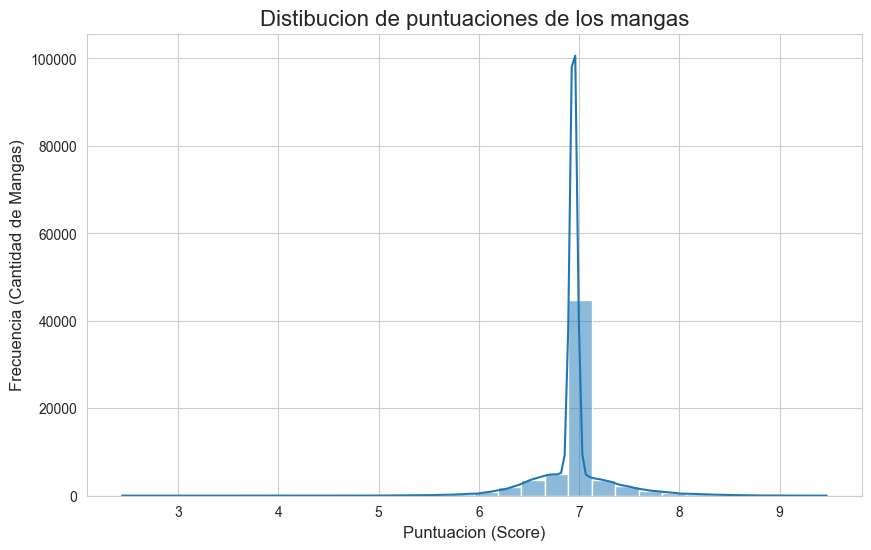

In [ ]:
#-----------------------#
# Eda y visualizaciones #
#-----------------------#

print("\n\n===== Iniciando Análisis Exploratorio de Datos (EDA) =====")
    
# --- Gráfico 1: Distribución de Puntuaciones ---
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='score', bins=30, kde=True)

plt.title("Distibucion de puntuaciones de los mangas", fontsize=16)
plt.xlabel("Puntuacion (Score)", fontsize=12)
plt.ylabel("Frecuencia (Cantidad de Mangas)", fontsize=12)



plt.show()

In [ ]:
# --- Gráfico 2: Top 10 Mangas más Populares ---
top_10_populares = df.sort_values(by="members", ascending=False).head(10)
# Ordenar por cantidad de miembros 
print("===== Top 10 Mangas mas populares =====")
display(top_10_populares[["title", "score", "members", "genres"]])

===== Top 10 Mangas mas populares=====


,title,score,members,genres
0,Berserk,9.47,643969,"['Action', 'Adventure', 'Award Winning', 'Dram..."
22,Shingeki no Kyojin,8.55,635373,"['Action', 'Award Winning', 'Drama']"
1,One Piece,9.22,579557,"['Action', 'Adventure', 'Fantasy']"
8,Chainsaw Man,8.75,569114,"['Action', 'Award Winning', 'Supernatural']"
27,Tokyo Ghoul,8.52,480001,"['Action', 'Fantasy', 'Horror']"
11,One Punch-Man,8.75,457481,"['Action', 'Comedy']"
15,Solo Leveling,8.68,435457,"['Action', 'Adventure', 'Fantasy']"
179,Boku no Hero Academia,8.09,424581,['Action']
100,Kimetsu no Yaiba,8.23,414593,"['Action', 'Fantasy']"
3,Oyasumi Punpun,9.02,413897,"['Drama', 'Slice of Life']"


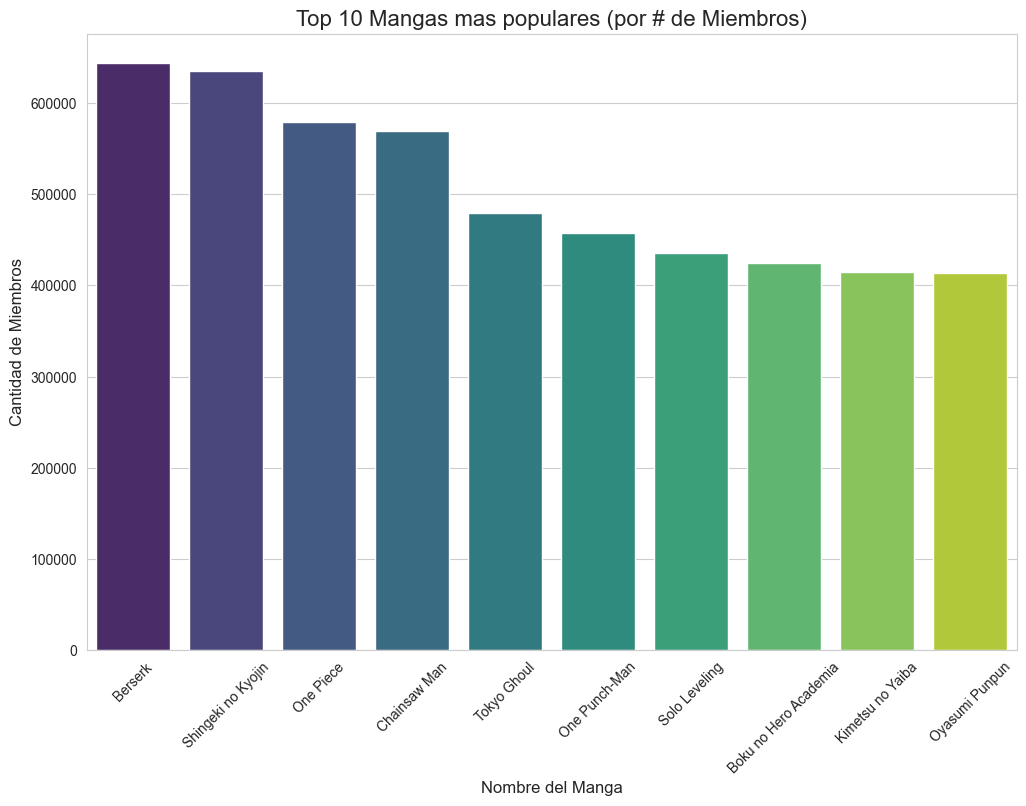

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data= top_10_populares, y="members", x="title", palette="viridis")

plt.title("Top 10 Mangas mas populares (por # de Miembros)", fontsize=16)
plt.ylabel("Cantidad de Miembros", fontsize=12)
plt.xlabel("Nombre del Manga", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



plt.show()

In [ ]:
# --- Gráfico 3: Tipos de Libros más Comunes y Generos mas populares ---

# Procesar la columna de geners para tenere un genero por fila 
# .explode() toma el data frame y por cada lista en la columna type, crea una nueva fila para cada elemento de la lista
types = df['type'].str.split(', ').explode() #transforma las filas de mangas en filas de type
genres = df['genres'].str.split(', ').explode()

# Contar la frecuencia de cada genero, nos quedamos con el top 10
top_10_type = types.value_counts().head(10) 
top_10_genres = genres.value_counts().head(10) 
print("===== Top Generos de manga mas populares =====")
print(top_10_genres)
print("\n===== Top tipos de libros mas populares =====")
print(top_10_type)

===== Top Generos de manga mas populares =====
genres
['Hentai']         9046
['Comedy'          8697
['Boys Love'       8572
'Romance']         8086
['Action'          7927
'Supernatural']    6876
'Erotica']         5789
['Romance']        5305
'Fantasy']         4604
['Drama'           4172
Name: count, dtype: int64

===== Top tipos de libros mas populares =====
type
manga          44077
light_novel    10224
one_shot        5248
manhwa          2986
doujinshi       1816
manhua           350
novel            132
Name: count, dtype: int64


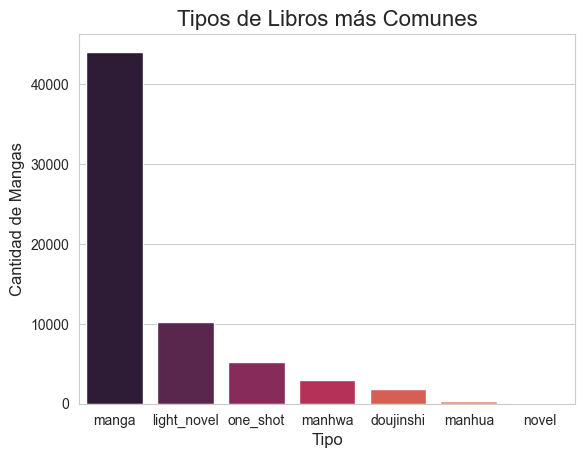

In [ ]:
# Libros más Comunes
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_type.values, x=top_10_type.index, palette='rocket')

plt.title('Tipos de Libros más Comunes', fontsize=16)
plt.ylabel('Cantidad de Mangas', fontsize=12)
plt.xlabel('Tipo', fontsize=12)
plt.tight_layout()


plt.show()

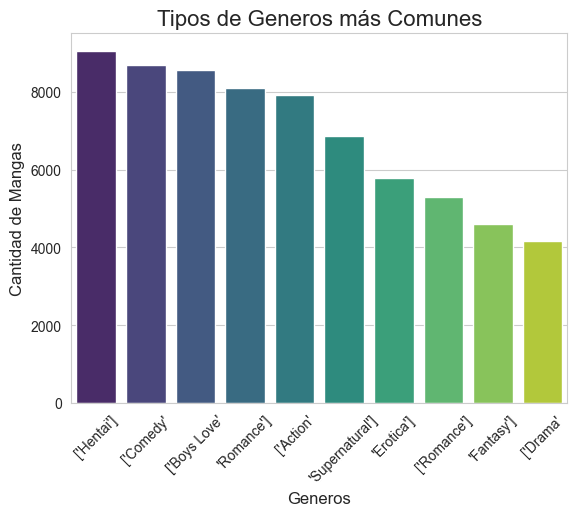

In [ ]:
# Generos mas populares
plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_genres.values, x=top_10_genres.index, palette='viridis')

plt.title('Tipos de Generos más Populares', fontsize=16)
plt.ylabel('Cantidad de Mangas', fontsize=12)
plt.xlabel('Generos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



plt.show()

In [ ]:
# --- Gráfico 4: Heatmap de Correlaciones Numéricas ---

df_numerico = df.select_dtypes(include=np.number)
mx_corr = df_numerico.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(mx_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación entre Variables Numéricas', fontsize=16)


plt.show()

In [ ]:
# --- Gráfico 5: Pairplot (Varibles numericas) ---

# 1. Seleccionar solo un puñado de columnas clave para comparar entre sí.
columnas_interesantes = ['score', 'members', 'volumes', 'favorites']

# 2. Crear el pairplot solo con este subconjunto.
#    .dropna() es importante para eliminar filas con valores nulos antes de graficar.
print("\nGenerando pairplot para variables seleccionadas (puede tardar un momento)...")
sns.pairplot(df[columnas_interesantes])



plt.show()

In [ ]:
# --- Mediciones Estadisticas --- 

print("Asimetria de Score: ", df["score"].skew())
print("\nCurtosis de Score: ", df["score"].kurtosis())


Asimetria de Score:  0.2953381106491386

Curtosis de Score:  8.568717962727156


In [ ]:
# Muestra de los lista de mangas mas populares por score de miembros y generos
print("===== Top manga mas populares (Score) =====")
top_10_populares[["title", "score", "members", "genres"]]

,title,score,members,genres
0,Berserk,9.47,643969,"['Action', 'Adventure', 'Award Winning', 'Dram..."
22,Shingeki no Kyojin,8.55,635373,"['Action', 'Award Winning', 'Drama']"
1,One Piece,9.22,579557,"['Action', 'Adventure', 'Fantasy']"
8,Chainsaw Man,8.75,569114,"['Action', 'Award Winning', 'Supernatural']"
27,Tokyo Ghoul,8.52,480001,"['Action', 'Fantasy', 'Horror']"
11,One Punch-Man,8.75,457481,"['Action', 'Comedy']"
15,Solo Leveling,8.68,435457,"['Action', 'Adventure', 'Fantasy']"
179,Boku no Hero Academia,8.09,424581,['Action']
100,Kimetsu no Yaiba,8.23,414593,"['Action', 'Fantasy']"
3,Oyasumi Punpun,9.02,413897,"['Drama', 'Slice of Life']"


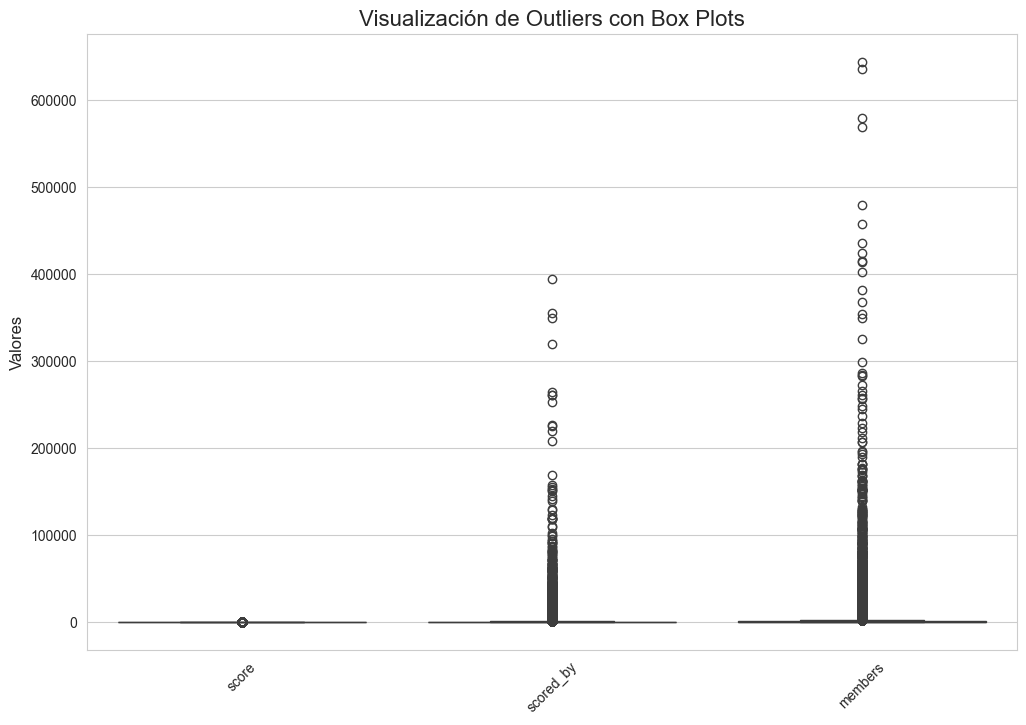

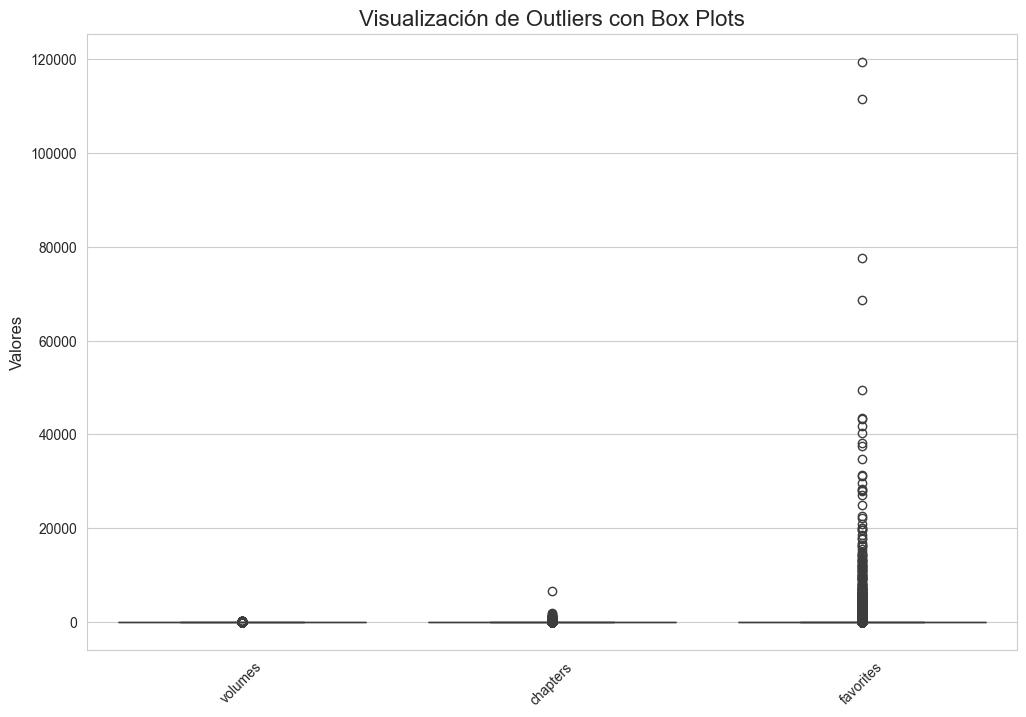

In [ ]:
# En este caso no es necesario "tratar" los outliders por que nos sirven como indicacdores de podpularidad para recomendar un producto o similar 

# Demostracion y Visualaizacion de Outlidesds
# Seleccionamos las columnas numéricas que queremos inspeccionar
df_num_boxA = df_numerico[["score", "scored_by","members"]]

df_num_boxB = df_numerico[["volumes", "chapters","favorites"]]
# Creamos la figura
plt.figure(figsize=(12, 8))

# Creamos el boxplot
# sns.boxplot es la función de Seaborn para este tipo de gráfico.
sns.boxplot(data=df_num_boxA)

# Añadimos títulos y etiquetas
plt.title('Visualización de Outliers con Box Plots', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Rotamos las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45)

# Mostramos el gráfico

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_num_boxB)

# Añadimos títulos y etiquetas
plt.title('Visualización de Outliers con Box Plots', fontsize=16)
plt.ylabel('Valores', fontsize=12)

# Rotamos las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45)

plt.show()

In [ ]:
#-----------------------------------------------------#
# Modelo 1: Recomendaror Basado en contenido (TF-IDF) #
#-----------------------------------------------------#

print("\n===== Construyendo Modelo 1: Recomendador Basado en Contenido =====")

# Ingenieria de caracteristicas a partir de texto (TF-IDF) para contenido
# Definir todas las columnas de texto que queremos combinar.
columnas_de_contenido = ['genres', 'themes', 'demographics', 'authors', 'type', 'serializations', 'synopsis']

# Para vitar error llenar con un espacio vacio cualquier posible nulo
for col in columnas_de_contenido:
    df[col].fillna('', inplace=True)

# Preparar columnas con multiples palabras 
#    Para 'Authors' y 'Serializations', unimos los nombres para que se traten como una sola entidad.
#    Ejemplo: "Miura, Kentaro" se convierte en "Miura,Kentaro" y el vectorizador lo tratará como un solo "token".
df['authors_clean'] = df['authors'].str.replace(' ', '')
df['serializations_clean'] = df['serializations'].str.replace(' ', '')

In [ ]:
# Crear una "súper columna" de contenido que combina todo.
# Añadir un espacio ' ' entre cada una para que se separen bien los términos.
df['contenido'] = (df['genres'] + ' ' +
                           df['themes'] + ' ' +
                           df['demographics'] + ' ' +
                           df['authors_clean'] + ' ' +
                           df['type'] + ' ' +
                           df['synopsis'] + ' ' +
                           df['serializations_clean'])

print("===== Ejemplo de la nueva columna contenido =====")
display(df[['title', 'contenido']].head())

# Crear el objeto TfidfVectorizer, combierte el texto vectores numericos
#    Añadimos 'stop_words' para que ignore palabras comunes en inglés de la sinopsis como 'a', 'the', 'is', etc., lo que mejora la calidad de las características.
# --- Vectorización con TF-IDF ---
tfidf = TfidfVectorizer(stop_words='english', max_features=20000)

# Aplicar fit_transform a la columna 'contenidio'
# Esto crea una matriz donde cada fila es un manga y cada columna un género (en este caso), con el valor TF-IDF correspondiente.
# Demas de que esta matriz de caracteristicas si cabe en la memeria
tfidf_matrix = tfidf.fit_transform(df['contenido'])
print(f"--- Matriz de Características TF-IDF creada con forma: {tfidf_matrix.shape} ---")

===== Ejemplo de la nueva columna contenido =====


,title,contenido
0,Berserk,"['Action', 'Adventure', 'Award Winning', 'Dram..."
1,One Piece,"['Action', 'Adventure', 'Fantasy'] [] ['Shoune..."
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"['Action', 'Adventure', 'Mystery', 'Supernatur..."
3,Oyasumi Punpun,"['Drama', 'Slice of Life'] ['Psychological'] [..."
4,Fullmetal Alchemist,"['Action', 'Adventure', 'Award Winning', 'Dram..."



===== Matriz de Características TF-IDF creada =====
La forma de la matriz es: 64833


In [ ]:
# --- Cálculo de Similitud del Coseno ---
# Crear una funcion de recomendacion por similitud del coseno
# Crear una Serie para mapear titulos a indices del dataframa para busquedas rapidas

indices = pd.Series(df.index, index=df['title']).drop_duplicates()
cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"--- Matriz de Similitud del Coseno (TF-IDF) creada con forma: {cosine_sim_tfidf.shape} ---")

# Defir la funcion de recomendacion que calcula la similitud
def recomendar_por_contenido(title, n_recommendations=10):
    """
    Recibe el título de un manga y devuelve una lista de los 'n' mangas más similares.
    """
    # Verificar que el manga exista en nuestros datos (df)
    if title not in indices:
        return f"El manga '{title}' no se encontró en el dataset."
    
    # Obtener el indice del manga de entrada
    idx = indices[title]

    # Calcular la similitud del coseno de ESE manga contra TODOS los demás
    simi_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)

    # Convertir los resultados en una lista de tuplas (incice, puntuacion)
    simi_scores = list(enumerate(simi_scores[0]))

    # Ordenar la lista de mayor a menor similutud
    simi_scores = sorted(simi_scores, key=lambda x: x[1], reverse=True)

    # Quedarse con las 'n' mejores, excluyendo la primera (que es el propio manga)
    simi_scores = simi_scores[1:n_recommendations+1]

    # Obtener los índices de los mangas recomendados
    manga_indices = [i[0] for i in simi_scores]

    # Devolver los títulos de esos mangas
    return df['title'].iloc[manga_indices]

In [43]:
print("\n--- Probando el recomendador basado en contenido ---") # Modelo 1

# Ejemplo 1: Un manga muy conocido
print("\n===== Recomendaciones para 'Berserk' =====")
display(recomendar_por_contenido('Berserk'))

# Ejemplo 2: Otro manga popular
print("\n===== Recomendaciones para 'Shingeki no Kyojin'=====")
display(recomendar_por_contenido('Shingeki no Kyojin'))


--- Probando el recomendador basado en contenido ---

===== Recomendaciones para 'Berserk' =====


19417                      Dead Word Puzzle
22848    Shousetsu Berserk: Enryuu no Kishi
15399               Doukyuusei no Macho-kun
29852                         Ultraman Tiga
15494                              Ourouden
60364                  Oshiete! Sabbath-san
30225                     Oresama no Ousama
11406                  Jinsei wa Barairo Da
15381                                   Noa
4322                                Duranki
Name: title, dtype: object


===== Recomendaciones para 'Shingeki no Kyojin'=====


1398             Shingeki no Kyojin: Before the Fall
4758                     Shingeki! Kyojin Chuugakkou
1455             Shingeki no Kyojin: Before the Fall
29187                                  Shinryuu Idea
5862                                   Chronos: Deep
27088                               Legend of Regios
27886                   Advance of Z: Flag of Titans
4282     Shingeki no Kyojin: Kakuzetsu Toshi no Joou
1035                  Shingeki no Kyojin: Lost Girls
3174                           Saint Seiya Episode G
Name: title, dtype: object

In [ ]:
#------------------------------------------------------------------------#
# Modelo 2: Recomendadore Basado en popularidd (Clasificacion Ponderada) #
#------------------------------------------------------------------------#

print("\n===== Construyendo Modelo 2: Recomendador Basado en Popularidad =====")

# --- Cálculo de Componentes para la Fórmula WR ---
C = df.score.mean() # puntuacion promedio de todos los mangas
print(f"La puntuación media de todos los mangas (C) es: {C:.2f}")

m = df.scored_by.quantile(0.90) # unbral minimo de votos uso el percentil 90 entonces el maga tiene que tener mas votos que el 90% de los demas para esta entre los mas pupulares
print(f"El número mínimo de votos para ser considerado (m) es: {int(m)}") #.quantile(0.90) calcula ese valor.



La puntuación media de todos los mangas (C) es: 6.95
El número mínimo de votos para ser considerado (m) es: 994


In [ ]:
# filtrar mangas que complen el requisito
# nuevo df con mangas con sufuicientes votos
mangas_calificados = df.copy().loc[df['scored_by'] >= m]
print(f"\n--- Número de mangas que superan el umbral para el ranking: {mangas_calificados.shape[0]} ---")


Número de mangas que superan el umbral para el ranking: 6488


In [46]:
# Definir y aplicar la funcion de clasidicacion ponderada (WR)

def WR_calificacion_ponderada(x, m=m, C=C):
    # Parámetros:
    #   x: Una fila del DataFrame.
    #   m: El umbral mínimo de votos (calculado antes).
    #   C: La media de todas las puntuaciones (calculado antes).

    v = x.scored_by # numero de votos del manga
    R = x.score # puntuacion del manga

    # Cálculo de la calificación ponderada
    return (v / (v + m) * R) + (m / (v + m) * C)


In [ ]:
# Aplicar la funcion a cada fila del dataset mangas_clasificados
mangas_calificados['WR'] = mangas_calificados.apply(WR_calificacion_ponderada, axis=1)

# Generar el top 10 de precomendacion por popularidad
# Ordenamos el DataFrame por la nueva puntuación ponderada de mayor a menor.
top_10_populares_ponderados = mangas_calificados.sort_values('WR', ascending=False).head(10)

print("\n===== Top 10 Mangas por Popularidad Ponderada (Recomendaciones para nuevos usuarios) =====")
# Mostramos las columnas más relevantes
display(top_10_populares_ponderados[['title', 'score', 'scored_by', 'WR']])


===== Top 10 Mangas por Popularidad Ponderada (Recomendaciones para nuevos usuarios) =====


,title,score,scored_by,WR
0,Berserk,9.47,319696,9.462174
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,151433,9.284644
5,Vagabond,9.24,129688,9.222545
1,One Piece,9.22,355375,9.213655
9,Monster,9.15,90296,9.125993
16,Slam Dunk,9.08,70877,9.050475
6,Vinland Saga,9.05,119797,9.032679
4,Fullmetal Alchemist,9.03,153151,9.016556
3,Oyasumi Punpun,9.02,168459,9.007829
18,Grand Blue,9.03,63438,8.997837


In [ ]:
#---------------------------#
# Modelo 3: Sistema Híbrido #
#---------------------------#

print("\n\n===== Construyendo Modelo 3: Sistema Híbrido =====")

def recomendar_hibrido(titulo_manga=None, n_recommendations=10):
    """
    Función de recomendación híbrida.
    - Si se proporciona un título, devuelve mangas similares (basado en contenido).
    - Si no se proporciona un título, devuelve los mangas más populares (basado en popularidad ponderada).
    """
    print("Sistema Híbrido Activado...")
    
    # Comprobar si se ha proporcionado un título de manga
    if titulo_manga:
        # --- Lógica del Modelo 1: Basado en Contenido ---
        print(f"Modo: Recomendación Basada en Contenido para '{titulo_manga}'")
        # Llamar a la función que ya creamos en la fase anterior
        recomendaciones = recomendar_por_contenido(titulo_manga, n_recommendations)
        return recomendaciones
    else:
        # --- Lógica del Modelo 2: Basado en Popularidad ---
        print("Modo: Recomendación de Popularidad para Nuevos Usuarios")
        # Devolver los títulos del DataFrame de popularidad que ya calculamos
        recomendaciones = top_10_populares_ponderados['title'].head(n_recommendations)
        return recomendaciones


# Escenario 1: Un usuario está viendo "Vinland Saga". Queremos mangas similares.
print("\n===== Escenario 1: Usuario viendo un manga específico =====")
recomendaciones_contenido = recomendar_hibrido(titulo_manga='Vinland Saga')
print("\n===== Recomendaciones sugeridas =====")
display(recomendaciones_contenido)


# Escenario 2: Un usuario nuevo llega a la página de inicio. Queremos mostrarle lo mejor.
print("\n===== Escenario 2: Usuario nuevo en la página principal =====")
recomendaciones_populares = recomendar_hibrido()
print("\n===== Recomendaciones sugeridas =====")
display(recomendaciones_populares)


===== Escenario 1: Usuario viendo un manga específico =====
Sistema Híbrido Activado...
Modo: Recomendación Basada en Contenido para 'Vinland Saga'

===== Recomendaciones sugeridas =====


14903    Assassin's Creed Valhalla x Vinland Saga
29782                                    Paramour
551                          Vagrant Soldier Ares
26766                             Areyo Hoshikuzu
63159      Shinsei Roma Teikoku: Sanjuunen Sensou
4056                                        Issak
43046                              Tetsujin Gamma
20335                              Kagefumi Merry
27500          Inka: Nikuyoku ni Aragaenai Karada
48306                          Hanaregatai Kemono
Name: title, dtype: object


===== Escenario 2: Usuario nuevo en la página principal =====
Sistema Híbrido Activado...
Modo: Recomendación de Popularidad para Nuevos Usuarios

===== Recomendaciones sugeridas =====


0                                             Berserk
2     JoJo no Kimyou na Bouken Part 7: Steel Ball Run
5                                            Vagabond
1                                           One Piece
9                                             Monster
16                                          Slam Dunk
6                                        Vinland Saga
4                                 Fullmetal Alchemist
3                                      Oyasumi Punpun
18                                         Grand Blue
Name: title, dtype: object

===== Encontrando el número óptimo de clusters (k) con el Método del Codo =====
(Esto puede tardar unos minutos, ya que entrenará varios modelos)


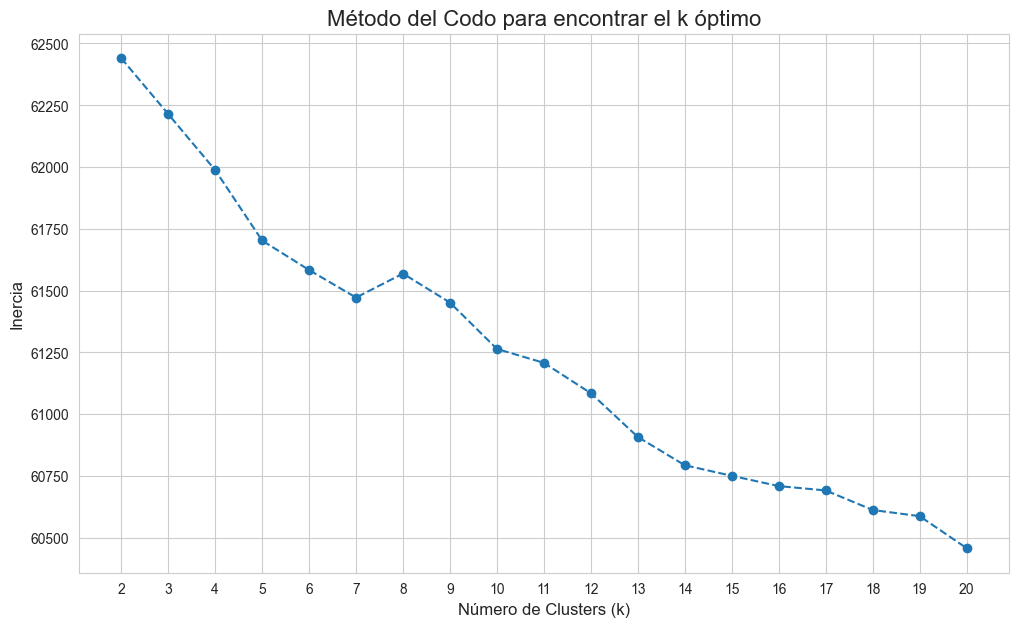

In [ ]:
#---------------------------------------------#
# Analisis Avanzado 1: Clustering con K-Means #
#---------------------------------------------#

# Encontrar el numero optimo de clusters
print("\n\n===== Análisis Avanzado: Clustering con K-Means =====")
print("\n===== Encontrando el número óptimo de clusters (k) con el Método del Codo =====")

print("\n(Esto puede tardar unos minutos, ya que entrenará varios modelos)")
range_n_clusters = range (2, 21) # probar de 2 a 20

inercia = [] # inercia de cada modelo

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(tfidf_matrix)

    inercia.append(kmeans.inertia_) # .inertia_ es un atributo del modelo K-Means que nos da la suma de las distancias al cuadrado.

# Graficamos los resultados
plt.figure(figsize=(12, 7))
plt.plot(range_n_clusters, inercia, marker='o', linestyle='--')
plt.title('Método del Codo para encontrar el k óptimo', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [ ]:
# --- Aplicando K-Means y Analizando Clusters ---
k_optimo = 6
print(f"\nSe ha elegido un k óptimo de {k_optimo}.")

kmeans = KMeans(n_clusters = k_optimo, n_init = 'auto', random_state = 42)
kmeans.fit(tfidf_matrix)

# Asignar los clusteres a el dataframe original
df['cluster'] = kmeans.labels_ #.labels_ nos da un array con la etiqueta del cluster para cada manga.
print(f"\nSe ha asignado cada manga a uno de los {k_optimo} clusters.")

# --- Inspección de los Clusters ---
for i in range(k_optimo):
    print(f"\n===== Top 5 Mangas Populares en Cluster {i} =====")
    cluster_mangas = df[df['cluster'] == i]
    display(cluster_mangas.sort_values('members', ascending=False)[['title', 'genres', 'score']].head())



Se ha elegido un k óptimo de 6.

Se ha añadido la columna 'cluster' al DataFrame:


,title,genres,cluster
0,Berserk,"['Action', 'Adventure', 'Award Winning', 'Dram...",0
1,One Piece,"['Action', 'Adventure', 'Fantasy']",0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"['Action', 'Adventure', 'Mystery', 'Supernatur...",0
3,Oyasumi Punpun,"['Drama', 'Slice of Life']",0
4,Fullmetal Alchemist,"['Action', 'Adventure', 'Award Winning', 'Dram...",0


In [ ]:
#--------------------------------------------------------------------#
# Analisis Avanzado 2: Embeddings con Autoencoder (tensorflow/Keras) #
#--------------------------------------------------------------------#

print("\n\n===== Análisis Avanzado: Embeddings con Autoencoder =====")
# --- Preparación de Datos de Muestra ---
# Trabajar con una muestra para evitar problemas de memoria
n_muestras = 20000
# Usars muestra aleatoria de índices de nuestra matriz TF-IDF
indices_muestra = np.random.choice(tfidf_matrix.shape[0], n_muestras, replace=False)
# Crear una sub-matriz dispersa con la muestra
tfidf_matrix_muestra = tfidf_matrix[indices_muestra]

# Convertimos la muestra a una matriz densa, que usaremos para entrenar
tfidf_matrix_muestra_densa = tfidf_matrix_muestra.toarray() # .toarray() convierte la matriz dispersa en una matriz numpy normal.

print(f"--- Creamos una muestra de {n_muestras} mangas para entrenar el autoencoder. ---")
print(f"--- Forma de los datos de entrenamiento: {tfidf_matrix_muestra_densa.shape} ---")

Hemos creado una muestra de 2000 mangas para entrenar el autoencoder.
Forma de los datos de entrenamiento: (2000, 20000)


In [ ]:
# --- Construcción del Autoencoder ---
input_dim = tfidf_matrix_muestra_densa.shape[1] # Dimensión de entrada: es el número de características de nuestros vectores TF-IDF

encoding_dim = 128 # Dimensión del embedding: este es un hiperparámetro.

# 1. Capa se entrada (input layer) define la forma de los datos que recibe la red.
input_layer = keras.Input(shape=(input_dim,), name='Input_Layer')
# 2. Encoder capa que comprime la entrada en un espacio de menor dimension (embedding)
encoder_layer = layers.Dense(encoding_dim, activation='relu', name='Encoder_Layer')(input_layer) # activacion relu estandar y efectiva
# 3. Decoder capa densa que intenta reconstruir la entrada original
decoder_layer = layers.Dense(input_dim, activation='sigmoid', name='Decoder_layer')(encoder_layer) # activacion sigmoid' es buena aquí porque los valores de TF-IDF están entre 0 y 1


# 4. Modelo Autoencoder une la entrada, el encoder y el decoder.
autoencoder = keras.Model(inputs=input_layer, outputs=decoder_layer, name="Autoencoder")
# 5. Modelo Encoder (separado), este modelo solo nos servirá para extraer los embeddings una vez entrenado
encoder_model = keras.Model(inputs=input_layer, outputs=encoder_layer, name="Encoder")


# 6. Compilar el Autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')# - optimizer='adam': El optimizador que ajustará los pesos de la red.
                                                                # - loss='mean_squared_error': La función de pérdida que intentará minimizar (el error de reconstrucción).

# Imprimimos un resumen de la arquitectura de nuestra red.
print("\n===== Arquitectura del Autoencoder =====")
autoencoder.summary()


===== Arquitectura del Autoencoder =====


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Layer (Dense)           │ (None, 128)            │     2,560,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_layer (Dense)           │ (None, 20000)          │     2,580,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,140,128 (19.61 MB)

 Trainable params: 5,140,128 (19.61 MB)

 Non-trainable params: 0 (0.00 B)


===== Entrenando el Autoencoder (puede tardar varios minutos)... ====
Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.2494 - val_loss: 0.2480
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.2475 - val_loss: 0.2457
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.2449 - val_loss: 0.2415
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.2397 - val_loss: 0.2323
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.2280 - val_loss: 0.2129
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.2042 - val_loss: 0.1794
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.1652 - val_loss: 0.1337
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1165 - val_loss: 0.0865
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0700 - val_loss: 0.0505
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0379 - val_loss: 0.0290
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0207 - val_loss: 0.0178
Epoch 12/20
8/

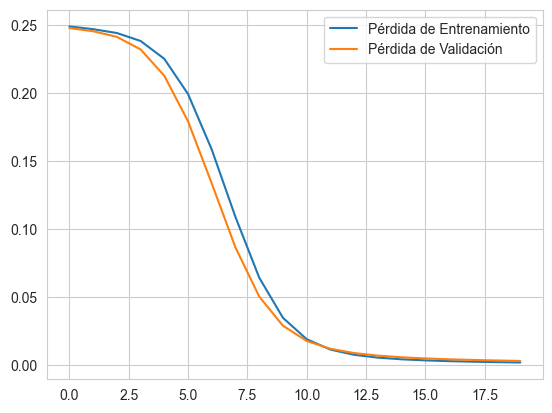

In [ ]:
# --- Entrenamiento ---
print("\n===== Entrenando el Autoencoder... =====")

# Parámetros:
history = autoencoder.fit(x=tfidf_matrix_muestra_densa, #Los datos de entrada (nuestra muestra densa).
                          y=tfidf_matrix_muestra_densa, #Los datos de salida que queremos predecir (¡son los mismos que la entrada!).
                          epochs= 20, #El número de veces que el modelo verá todos los datos de entrenamiento.
                          batch_size= 256, #El número de muestras a procesar antes de actualizar los pesos.
                          shuffle= True, #Mezcla los datos en cada época para un mejor aprendizaje.
                          validation_split= 0.1 #Separa un 10% de los datos para validar el rendimiento en cada época.
                          )

print("===== ¡Entrenamiento completado! =====")

# Historial de pedida (aprendizaje del modelo)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.show()

In [ ]:
# Etraccion y uso de los nuevos Embeddinngs
# --- Generación de Embeddings ---

# NOTA: Usamos la matriz TF-IDF completa y dispersa para la predicción,
# Keras puede manejarla eficientemente en este paso.
print("\n===== Generando embeddings para todo el catálogo... =====")
manga_embeddings = encoder_model.predict(tfidf_matrix)

print(f"===== ¡Nuevos embeddings generados con éxito! =====")
print(f"\nLa forma de nuestra nueva matriz de embeddings es: {manga_embeddings.shape}")

#nueva matriz de similitud
cosine_sim_neural = cosine_similarity(manga_embeddings, manga_embeddings)
print(f"Nueva matriz de similitud basada en redes neuronales creada, forma: {cosine_sim_neural.shape}")


===== Generando embeddings para todo el catálogo usando el encoder entrenado... =====
2027/2027 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step
===== ¡Nuevos embeddings generados con éxito! =====

La forma de nuestra nueva matriz de embeddings es: (64833, 128)
Nueva matriz de similitud basada en redes neuronales creada, forma: (64833, 64833)


In [ ]:
# Uso de los Embeddings neuronales para la recomendacion
# --- Nueva Función de Recomendación (Embeddings) ---
def recomendar_con_embeddings(title, n_recommendations=10):
    """
    Recibe un título de manga y devuelve los 'n' más similares
    usando la similitud del coseno sobre los EMBEDDINGS neuronales.
    """
    # Validar que el manga exista
    if title not in indices:
        return f"El manga '{title}' no se encontró en el dataset."

    # Obtener el índice del manga de entrada
    idx = indices[title]

    # Obtener el vector de embedding de ESE manga
    manga_vector_embedding = manga_embeddings[idx].reshape(1, -1)

    # Calcular la similitud del coseno de ese embedding contra TODOS los demás
    # Esta es la parte eficiente en memoria
    sim_scores = cosine_similarity(manga_vector_embedding, manga_embeddings)
    sim_scores = list(enumerate(sim_scores[0]))

    # Ordenar los mangas por similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener los 'n' mejores, excluyendo el primero (el propio manga)
    sim_scores = sim_scores[1:n_recommendations+1]

    # Obtener los índices y devolver los títulos
    manga_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[manga_indices]

#Comparacion de resultados

print("===== Comparando Modelos de Recomendación =====")

print("\n===== Recomendaciones para 'Berserk' (Modelo TF-IDF) =====")
display(recomendar_por_contenido('Berserk'))

print("\n===== Recomendaciones para 'Berserk' (Modelo Red Neuronal) =====")
display(recomendar_con_embeddings('Berserk'))

print("\n-------------------------------------------------")

print("\n===== Recomendaciones para 'Neon Genesis Evangelion' (Modelo TF-IDF) =====")
display(recomendar_por_contenido('Neon Genesis Evangelion'))

print("\n===== Recomendaciones para 'Neon Genesis Evangelion' (Modelo Red Neuronal) =====")
display(recomendar_con_embeddings('Neon Genesis Evangelion'))

===== Comparando Modelos de Recomendación =====

===== Recomendaciones para 'Berserk' (Modelo TF-IDF) =====


19417                      Dead Word Puzzle
22848    Shousetsu Berserk: Enryuu no Kishi
15399               Doukyuusei no Macho-kun
29852                         Ultraman Tiga
15494                              Ourouden
60364                  Oshiete! Sabbath-san
30225                     Oresama no Ousama
11406                  Jinsei wa Barairo Da
15381                                   Noa
4322                                Duranki
Name: title, dtype: object


===== Recomendaciones para 'Berserk' (Modelo Red Neuronal) =====


44559                                            Divi-Dead
24341                                            Scape-God
4278                                       Yokubou Shounen
131                                              Dr. Stone
26725    Houkago no Seijo-san ga Toutoi dake ja Nai Kot...
7550                    Sankaku no Kyori wa Kagirinai Zero
13213                                   Sexual Hunter Riot
22177                                      Kokushi Musou!!
10301                                           Love Trial
73                          Tensei shitara Slime Datta Ken
Name: title, dtype: object


-------------------------------------------------

===== Recomendaciones para 'Neon Genesis Evangelion' (Modelo TF-IDF) =====


6393                                     Evangelion: ANIMA
6629            Neon Genesis Evangelion: Campus Apocalypse
9987     Shinseiki Evangelion: Ikari Shinji Ikusei Keikaku
14108                                             Godspeed
36919                               Hajimete no Gyakusatsu
31609                             Kaitou Tenshi Twin Angel
6059                                            Death Edge
40574                                            Spy no Ie
39181                           Mangaka Zankoku Monogatari
630                            Angel Beats!: Heaven's Door
Name: title, dtype: object


===== Recomendaciones para 'Neon Genesis Evangelion' (Modelo Red Neuronal) =====


1576     Maou ni Natta node, Dungeon Tsukutte Jingai Mu...
20728                                              Puchi-D
30141    Moto Keikoku no Bijo to Flag Crusher Outaishi:...
34423                                                Enzai
4620     Maou ni Natta node, Dungeon Tsukutte Jingai Mu...
17977                          Nemurenu Yoru no Monogatari
38608                                      Tsuki no Sabaku
37793                                      Oshiete♡Oneesan
41075                                             Kotonoha
19646         If You Give Me Flowers, I'll Give You Myself
Name: title, dtype: object